<a href="https://colab.research.google.com/github/csgellert/tobbvalt-projekt/blob/prob%C3%A1lgat%C3%A1s/snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 100/100 [00:23<00:00,  4.21it/s]


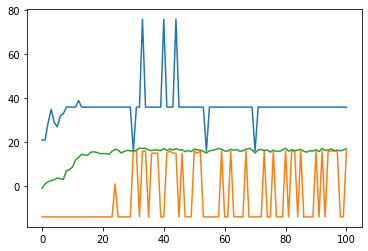

In [2]:
from osztalyok import *   # minden osztályt / függvényt az osztalyok csomagból importálunk
from tqdm import tqdm
#main()
#mozgott = False    # nem tudjuk mit csinál, lehet hogy még később kell
ai = evol() # kezdő generáció
genszam = 100
for i in tqdm(range(genszam)):
    ai.play()
    ai.fejlodes()
    ai = newgen(ai) # következő gen
    #print(i)
ai.play(False) #Ha ezt átírjátok True ra akkor megjeleníti a játékmenetet is
ai.fejlodes(True)